## Installing and Loading Required Packages for This NLP Project

* Numpy
* Pandas
* Matplotlib
* Seaborn
* wordcloud
* Scikit Learn
* nltk
* String

In [1]:
# Installing Wordcloud in the jupyter notebook environment

!pip install wordcloud

In [2]:
# Importing Required Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
import nltk # Natural Language Tool Kit
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Reading and Basic Data Exploration - Sanity Checks

* Read the data set called 'twitter.csv'
* Shape of the data frame
* Name of the columns
* Column Data Types
* Unique column values
* Getting the Information of the column
* Use describe() method to get Statistical Information
* Access the specific columns of the data frame

In [3]:
# Reading the 'twiter.csv' file as data

data = pd.read_csv('twitter.csv')
data.head()

# Consider the Tweets as the input
# Consider the Labels as the output
# Other columns must be dropped for better understanding

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
# Shape of the data frame

print('Number of Rows is:', data.shape[0])
print('Number of Column is:', data.shape[1])

Number of Rows is: 31962
Number of Column is: 3


In [5]:
# Get the Column Names of the data frame

data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [6]:
# Get the Column Types of the data frame

data.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [7]:
# What are the Unique entries of the 'label' column

data['label'].unique()

# 0 means Positive sentiment
# 1 means Negative Sentiment

array([0, 1], dtype=int64)

In [8]:
# Get the information of the data frame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [9]:
# Get the Statistical Summary of the data frame

data.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [10]:
# To access the 'tweet' column from the data frame data

data['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

## Data Manipulation for Future use

* Droping the 'id' column from the data
* Craeting a new column 'length' that counts the tewwt lengths
* Create two separate data frames named positive (for label 0) and negative (for label 1)
* Using the .join() method for convert the tweets in a single big string

In [11]:
# Drop the 'id' column from the data set
# Store that in the same name

data = data.drop(['id'], axis = 1)
data.info() # The drop method runs sucessfully

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [12]:
# Counting the Length of Each tweets of the data frame
# Storing the result in a new column called 'length'

data['length'] = data['tweet'].apply(len)
data.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [13]:
# Now check the Statistical Informations about the data set

data.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [14]:
# Extracting the Tweets that are shortest, Longest and has Average Length

print('The Shortest Tweet is:',data[data['length'] == 11]['tweet'])
print('--------------------------------------------------------------')
print('The Longest Tweet is:',data[data['length'] == 274]['tweet'])
print('--------------------------------------------------------------')
print('Average Length Tweet:', data[data['length'] == 84]['tweet'].iloc[0])

The Shortest Tweet is: 25195    i love you 
Name: tweet, dtype: object
--------------------------------------------------------------
The Longest Tweet is: 19770     @user lmfao pathetic #soit   #growup #funny #...
Name: tweet, dtype: object
--------------------------------------------------------------
Average Length Tweet: my mom shares the same bihday as @user   bihday snake! see you this weekend ðð¼


In [15]:
# Create two separate data frames from the data in hand

# The first data frame is of name 'positive' defined as follows


positive = data[data['label'] == 0]
positive.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [16]:
# The Second Data Frame is negative defined as follows

negative = data[data['label'] == 1]
negative.head()

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104


In [17]:
# Coverting the Tweets in list format and checking the length 

string = data['tweet'].tolist()
len(string)

31962

In [18]:
# Join all the 31962 list elements to form a big joined string

joinedstring = " ".join(string)
joinedstring

# Check the length of the joinedstring object

len(joinedstring)

2740409

## Data Set Cleaning - Punctuations, StopWords, Tokenization

* Using string module to detect punctuations, Example on how to clean them
* Using nltk to get the list of stopwords and example on how to clean them
* Use of Data Pre-processing as a step of data cleaning - Vectorization the texts using sklearn

In [20]:
# What characters are considered as punctuations in python string library

import string
print(string.punctuation)

print('---------------------------------')

# How to Remove Punctuations from sentence manually

quote = '$I am An()*&iket @Chakraborty, Student of &MA&^%$#HE'
filterquote = [char for char in quote if char not in string.punctuation]
filterquote
filterquotejoined = "".join(filterquote) # Joining the Elements of the filterquote object
filterquotejoined

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
---------------------------------


'I am Aniket Chakraborty Student of MAHE'

In [21]:
# What are the stopwords in Natural English Language
# StopWords: The words in every language that do not add any value to a sentence

print(stopwords.words('english')[0:11])

print('-----------------------------')

# How to Clean StopWords Manually

quote = "I am Aniket, didn't know I can come to this far and enjoy coding"
filterquote = [char for char in quote.split() if char.lower() not in stopwords.words('english')]
filterquotejoined = " ".join(filterquote)
filterquotejoined

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]
-----------------------------


'Aniket, know come far enjoy coding'

In [22]:
# Tokenization and Vectorization of a sentence

sample = ['This is the First paper', 'Is this the second paper','The third paper looks good',
          'The topic covered in this fourth paper is not up to the mark']

# Instantiate a vectorizer object
vectorizer = CountVectorizer()

# Transforming the sample data
x = vectorizer.fit_transform(sample)

# Get the feature names
print(vectorizer.get_feature_names_out()) # Unique words in the sample

# Getting the Vectorized Samples
print(x.toarray())

['covered' 'first' 'fourth' 'good' 'in' 'is' 'looks' 'mark' 'not' 'paper'
 'second' 'the' 'third' 'this' 'to' 'topic' 'up']
[[0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0]
 [0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0]
 [1 0 1 0 1 1 0 1 1 1 0 2 0 1 1 1 1]]


## Applying Punctuation Cleaning, StopWord Cleaning and Tokenization on the data set

* Define a function that takes string and results a fully cleaned string as output
* The string must be free from any punctuation and stopwords
* Apply the same vectorization pipeline defined previously, but now on the data set in hand

In [23]:
# Create a python function called sentence_cleaning
# It will perform three tasks - 
# Task - 1: Removal of punctuations
# Task - 2: Removal of Stopwords

def sentence_cleaning(sentence):
    filteredsentence = [char for char in sentence if char not in string.punctuation]
    joinedsentence = ''.join(filteredsentence)
    finaloutput = [char for char in joinedsentence.split() if char.lower() not in stopwords.words('english')]
    return finaloutput

# Apply the function sentence_cleaning on the data set and store the result in a variable called data_clean

data_clean = data['tweet'].apply(sentence_cleaning)

In [24]:
# Getting the first 5 entries of the cleaned data frame data_clean

print('The Cleaned Version is:',data_clean[5])
print('The Original Version is:', data['tweet'][5])

The Cleaned Version is: ['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']
The Original Version is: [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [25]:
# Apply the CountVectorizer once again on the data frame in hand

vectorizer = CountVectorizer(analyzer = sentence_cleaning, dtype = np.uint8)
vectweets = vectorizer.fit_transform(data['tweet'])

print('--------------------------- The Unique Feature Names are -------------------------------')

print(vectorizer.get_feature_names_out())

print('-------------------------- The Vectorized Texts in Matrix Format -------------------')

print(vectweets.toarray())

print('-------------------------- The Shape of the Matrix is Given as ----------------------')

print(vectweets.shape)

print('-------------------------- The Dataframe from The Vectorized Matrix Can be seen as -----------------------')

dfinput = pd.DataFrame(vectweets.toarray())
dfinput.head() # This is the Input of My AI Model

--------------------------- The Unique Feature Names are -------------------------------
['0' '0000001' '00027' ... 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86'
 'ó¾°\x80ó¾°\x80ó¾°\x80']
-------------------------- The Vectorized Texts in Matrix Format -------------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-------------------------- The Shape of the Matrix is Given as ----------------------
(31962, 47386)
-------------------------- The Dataframe from The Vectorized Matrix Can be seen as -----------------------


,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# The Outpu of the Model is the 'label' parameter

dfoutput = data['label']

## Data Visualization Using Matplotlib & Seaborn

* Creating Heatmap for the Missing Values
* Getting the Histogram for binary labels using Matplotlib
* Getting the Countplot for the labels using seaborn
* Getting the istribution of Tweet Lengths using histogram
* Plotting wordcloud for the actual data, postive data and negative data

<Axes: >

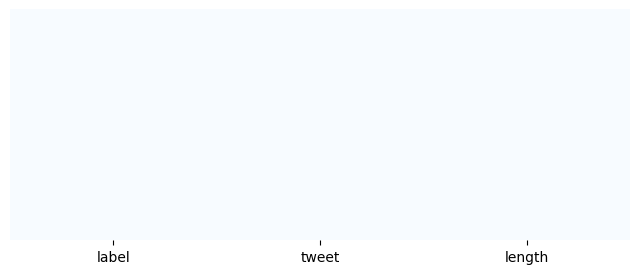

In [27]:
# Creating Heatmap Using the Seaborn Library

plt.figure(figsize = (8,3))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

# This plot is empty as the data dataframe has no missing values
# The plot will only indicate the missing values if any exists in the data frame

<Axes: >

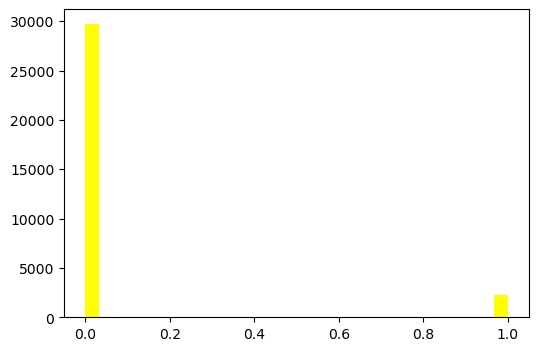

In [28]:
# Plotting the Histogram for the data data frame and use yellow color
# Use matplotlib for this

plt.figure(figsize = (4,4))
data['label'].hist(bins = 30, figsize = (6,4), color = 'yellow', grid = False)

# It efficiently shows that near 30000 samples belong to class 0
# Very few samples belong to class 1
# It also shows that there are only two entries for lables 0 and 1

<Axes: xlabel='label', ylabel='count'>

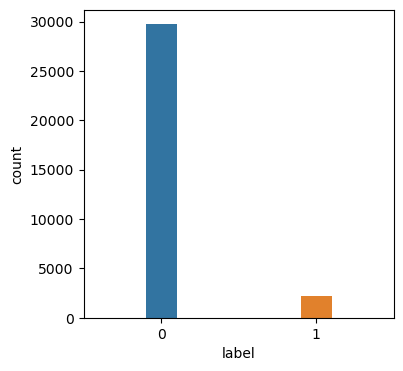

In [29]:
# Getting the countplot using sns library
# It will give the counts of labels for each category

plt.figure(figsize = (4,4))
sns.countplot(x='label', data = data , label='Count', width = 0.2)

<Axes: ylabel='Frequency'>

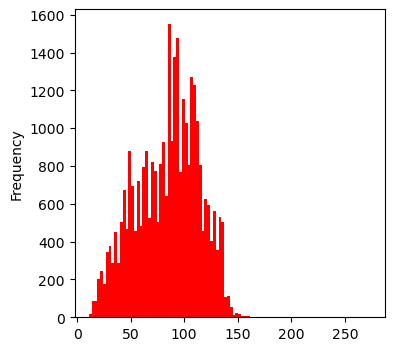

In [30]:
# To observe the diswtribution of the 'length' column
# Use histogram

plt.figure(figsize = (4,4))
data['length'].plot(kind = 'hist', bins = 100, color = 'red')

(-0.5, 399.5, 199.5, -0.5)

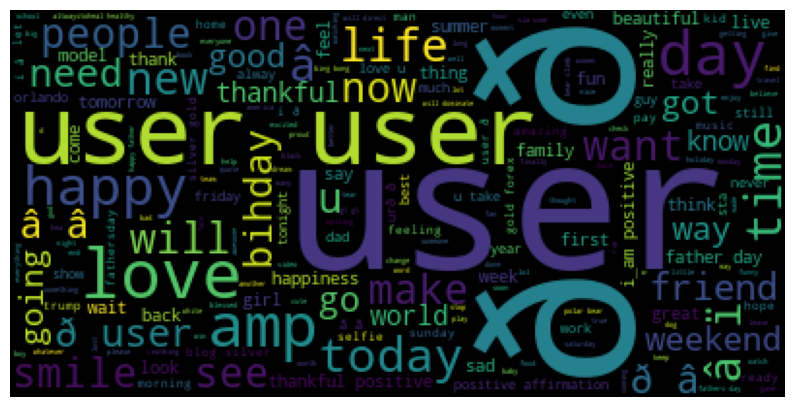

In [31]:
# Creating A WordCloud from the joinedstring object

plt.figure(figsize = (10,10))
plt.imshow(WordCloud().generate(joinedstring))
plt.axis('off')

Number of Elements in posstring is: 29720
Number of Characters in Joined String for Positive Label is: 2535966


(-0.5, 399.5, 199.5, -0.5)

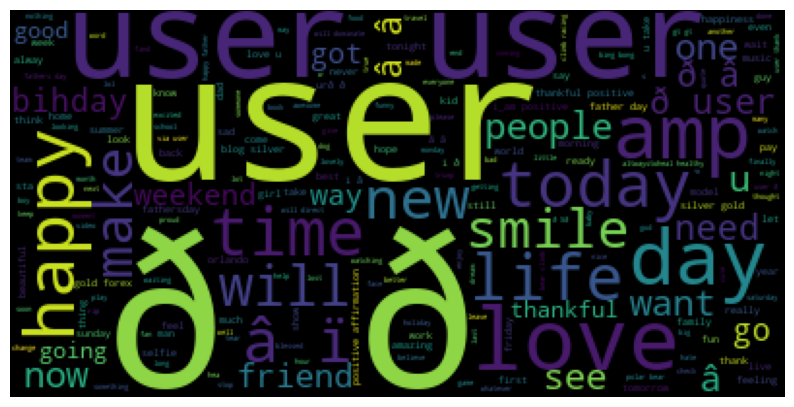

In [32]:
# Creating the WordCloud for the data frame named positive

# Step-1: Convert the postive tweets into list objects
posstring = positive['tweet'].tolist()
print('Number of Elements in posstring is:',len(posstring))

# Step-2: Join the Elements of posstring to form a big joined string object
posjoinedstring = " ".join(posstring)
print('Number of Characters in Joined String for Positive Label is:', len(posjoinedstring))

# Step-3: Plot the WordCloud for the Positive Tweets
plt.figure(figsize = (10,10))
plt.imshow(WordCloud().generate(posjoinedstring))
plt.axis('off')

Number of Elements in negstring is: 2242
Number of Characters in Joined String for negative Label is: 204442


(-0.5, 399.5, 199.5, -0.5)

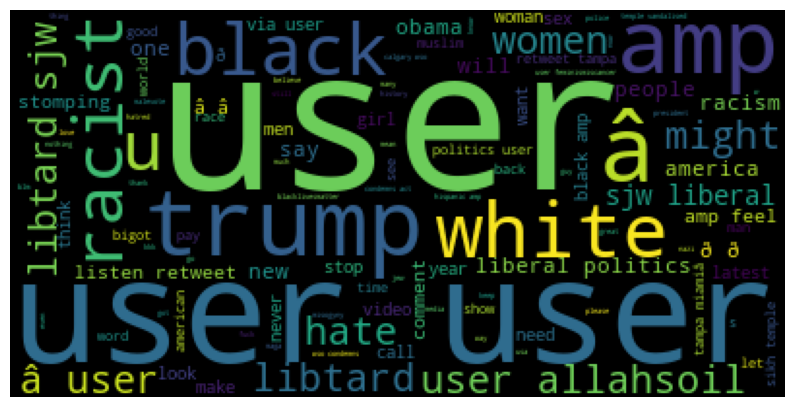

In [33]:
# Creating the WordCloud for the data frame named negative

# Step-1: Convert the postive Tweets into list objects
negstring = negative['tweet'].tolist()
print('Number of Elements in negstring is:',len(negstring))

# Step-2: Join the Elements of negstring to form a big joined string object
negjoinedstring = " ".join(negstring)
print('Number of Characters in Joined String for negative Label is:', len(negjoinedstring))

# Step-3: Plot the WordCloud for the Positive Tweets
plt.figure(figsize = (10,10))
plt.imshow(WordCloud().generate(negjoinedstring))
plt.axis('off')

## Machine Learning & Artificial Intelligence Model Development

* Use sklearn library to train and test model
* Use of Naive Bayes model for ML
*
*
*


In [35]:
# Check the Input and Output shape of the model

print('The Input is of shape:', dfinput.shape)
print('The Output is of shape:', dfoutput.shape)

The Input is of shape: (31962, 47386)
The Output is of shape: (31962,)


In [36]:
# Renaming the input and output for ease of use

X = dfinput
y = dfoutput

In [38]:
# Spliting the Model using sklearns train_test_split function

from sklearn.model_selection import train_test_split # For splitting the Data set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [39]:
# Defining the Model, Training the model with X_train and y_train

from sklearn.naive_bayes import MultinomialNB

# Define Model
NB_model = MultinomialNB()

# Train the Model With X_train, y_train
NB_model.fit(X_train, y_train)

MultinomialNB()

In [40]:
# Getting the Prediction from the NB_model

prediction = NB_model.predict(X_test)

<Axes: >

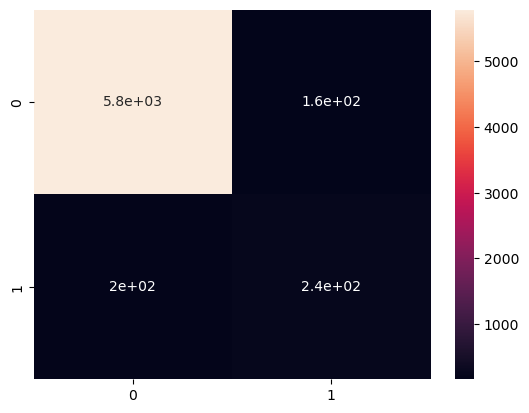

In [41]:
# Judging the Accuracy of the NB_model using classification_report and confusion_matrix

# Importing Packlages for Knowing the Model Accuracy
from sklearn.metrics import classification_report, confusion_matrix

# Plotting the Confusion Matrix for the Model Accuracy
cnfm = confusion_matrix(y_test, prediction)
sns.heatmap(cnfm, annot = True)

In [43]:
# Getting the Classification Report for This Model

report = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5947
           1       0.60      0.55      0.57       446

    accuracy                           0.94      6393
   macro avg       0.78      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393

